In [ ]:
df=pd.read_csv('/content/Fertilizer Prediction.csv')

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import joblib
import pickle
warnings.filterwarnings('ignore')

In [ ]:
df.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [ ]:
df.size

891

In [ ]:
df.shape

(99, 9)

In [ ]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
df['Fertilizer Name'].unique

<bound method Series.unique of 0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object>

In [ ]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [ ]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

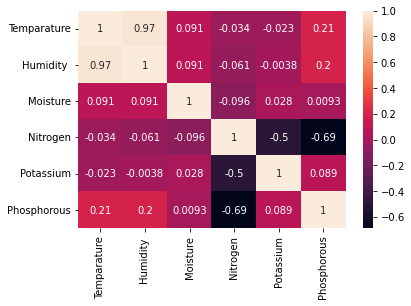

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]


array([-0.48181206,  1.98206242, -0.59408853, -0.50452498, -0.41169348,
       -0.24806947, -0.33601075, -0.33601075, -0.17277369, -0.36214298,
       -0.24806947, -0.36214298,  3.24037035, -0.43549417, -0.24806947,
       -0.36214298, -1.50323411, -1.54242294, -1.00710689,  0.46072126,
       -0.57643157,  0.09092764])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
0,0
1,1
2,2
3,3
4,4


In [ ]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [ ]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil Type    79 non-null     int64
 4   Crop Type    79 non-null     int64
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int64(8)
memory usage: 5.6 KB


In [ ]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_rand = rand.predict(x_test)

In [ ]:
df.head

<bound method NDFrame.head of     Temparature  Humidity   Moisture  ...  Potassium  Phosphorous  Fertilizer Name
0            26         52        38  ...          0            0                6
1            29         52        45  ...          0           36                5
2            34         65        62  ...          9           30                1
3            32         62        34  ...          0           20                4
4            28         54        46  ...          0            0                6
..          ...        ...       ...  ...        ...          ...              ...
94           25         50        32  ...          0           19                4
95           30         60        27  ...         17           17                0
96           38         72        51  ...          0            0                6
97           36         60        43  ...          0           41                5
98           29         58        57  ...          0     

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  0.9748338081671415
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
y_train[3]

4

In [ ]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[34,65,62	,0,	1,	7,	9,	30]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

14-35-14


In [ ]:
filename='finalized_model.sav'
joblib.dump(model,filename)

['finalized_model.sav']